In [1]:
import networkx as nx
import operator
import urllib
import random
import matplotlib.pyplot as plt
import collections
import numpy as np

In [2]:
#Question 1

In [3]:
def our_newman_girvan(G,k):
    while len(list(nx.connected_components(G)))!= k:
        dic =nx.edge_betweenness_centrality(G)
        max_edge=max(dic.items(), key=operator.itemgetter(1))[0]
        G.remove_edge(max_edge[0],max_edge[1])
    connected_comp= list(nx.connected_components(G))
    return connected_comp
        



In [4]:
link ="http://slavanov.com/teaching/sn1718b/data/communities.txt"
f = urllib.request.urlopen(link)
G=nx.Graph();
line = f.readline()
while(line != " "):
    line = str(line)
    line= line[2:-3]
    lst= line.split(" ")
    line= f.readline()
    if (lst[0]==''):
        break
    G.add_edge(lst[0],lst[1]) 
graphs=list(G.subgraph(c) for c in nx.connected_components(G))
max_con={}
max_len=0
for g in graphs:
    if len(g.nodes())> max_len:
        max_len=len(g.nodes())
        max_con=g
G1=nx.Graph(max_con)
result=our_newman_girvan(G1,3) 

In [5]:
# Question 4:

In [6]:
# Implement k-clique communities detection algorithm.
# The algorithm should receive a network and parameter k (size of clique) are return the communities.

def find_k_clique_communities(G, k):
    
    # Create a list the maximal cliques in G
    cliques_list = list(nx.find_cliques(G))
    num_of_cliques = len(cliques_list)
    #print(cliques_list)
    
    # Initilize the cliques matrix
    cliques_matrix = [[ 0 for i in range(num_of_cliques)] for j in range(num_of_cliques)]
    for i in range(num_of_cliques):
        for specific_node in cliques_list[i]:
            for j in range(num_of_cliques):
                for node in cliques_list[j]:
                    if specific_node == node:
                        cliques_matrix[i][j] += 1
    #print(np.matrix(cliques_matrix))
    
    # Initilize the threshold matrix
    threshold_matrix = [[ 0 for i in range(num_of_cliques)] for j in range(num_of_cliques)]
    for i in range(num_of_cliques):
        for j in range(num_of_cliques):
            if i==j :
                if cliques_matrix[i][j] >= k :
                    threshold_matrix[i][j] = 1
            else:
                if cliques_matrix[i][j] >= k-1 :
                    threshold_matrix[i][j] = 1                
    #print(np.matrix(threshold_matrix))
    
    # Create the communities List
    communities_list = []
    components_graph = nx.Graph()
    for i in range(num_of_cliques):
        for j in range(num_of_cliques):
            if threshold_matrix[i][j] == 1:
                components_graph.add_edge(i,j)
    connected_components = nx.connected_components(components_graph)            
    for component in connected_components:
        temp = set()
        for i in component:
            for node in cliques_list[i]:
                temp.add(node)
        communities_list.append(temp)
        
    """
    # optional: add isolated communities
    for node in G.nodes():
        count = 0
        temp = set()
        for community in communities_list:
            if node in community:
                count+=1
        if count==0 :
            temp.add(node)
            communities_list.append(temp)
    """
    
    return communities_list

In [17]:
def create_graph_from_database(path):
    G = nx.Graph()
    f = urllib.request.urlopen(path)
    for line in f.readlines():
        line = str(line)
        line= line[2:-3]
        edge = str(line).split(' ')
        G.add_edge(edge[0], edge[1])
    return G

def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
        
path = "http://slavanov.com/teaching/sn1718b/data/communities.txt"
database_graph = create_graph_from_database(path)

#draw
#plt.figure(figsize=(15,15))
#nx.draw(database_graph, with_labels = True, node_color = 'pink')

The number of communities found : 9
The communities:  [{'100', '132', '72', '277', '148', '31', '317', '342', '54', '98', '9', '303', '250', '142', '69', '130', '77', '1', '158', '211', '212', '103', '3', '196', '258', '119', '248', '242', '94', '295', '290', '239', '281', '304', '271', '129', '249', '75', '284', '21', '36', '136', '347', '59', '341', '184', '25', '45', '57', '38', '163', '222', '104', '5', '66', '257', '10', '322', '161', '180', '109', '185', '291', '246', '126', '27', '346', '320', '87', '113', '128', '63', '188', '133', '297', '122', '92', '229', '39', '313', '156', '40', '65', '221', '266', '329', '62', '339', '159', '324', '176', '331', '251', '16', '29', '170', '134', '64', '236', '274', '194', '276', '171', '85', '73', '178', '268', '123', '80', '88', '345', '7', '141', '314', '252', '272', '56', '189', '84', '208', '280', '254', '150', '22', '200', '302', '96', '101', '146', '285', '203', '217', '318', '308', '60', '213', '231', '334', '309', '55', '26', '232',

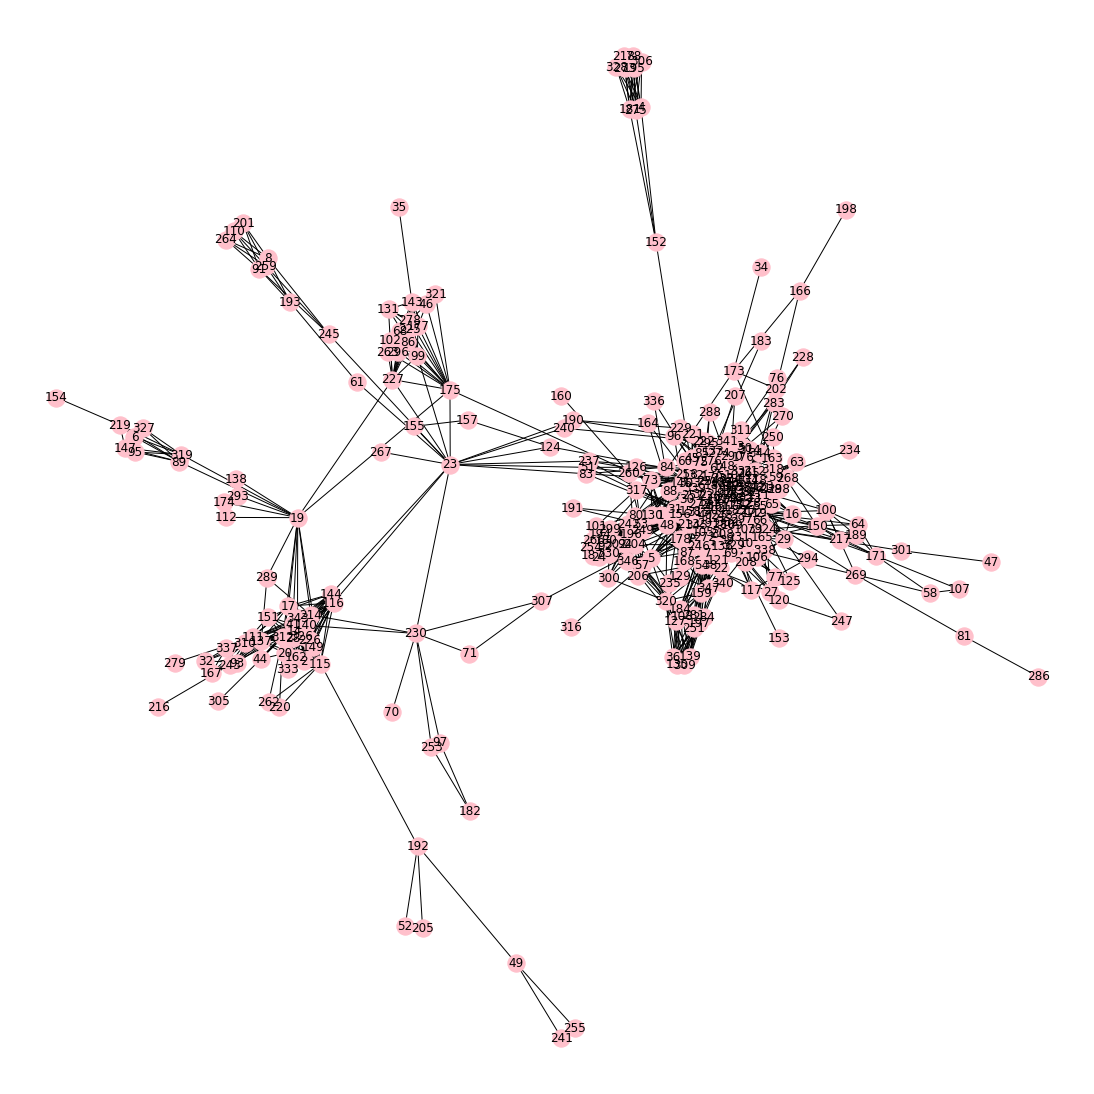

In [18]:
# find the biggest connected component
component_subgraphs = connected_component_subgraphs(database_graph)
max_connected_component_graph = max(component_subgraphs,key=len)

communities = find_k_clique_communities(max_connected_component_graph, 4)
print("The number of communities found :" ,len(communities))
print("The communities: ",communities)

#draw
print("The max connected component graph:")
plt.figure(figsize=(15,15))
nx.draw(max_connected_component_graph, with_labels = True, node_color = 'pink')